## Data source by API - Quandl and Yahoo Finance

* https://www.quandl.com/

In [7]:
# ! pip3 install quandl

In [8]:
import matplotlib.pyplot as plt
import quandl
import seaborn as sns
import datetime
%matplotlib inline

In [9]:
quandl.ApiConfig.api_key = "yourapikey"  # write your own quandl api key. You have to create an account 

In [10]:
mydata = quandl.get('EIA/PET_RWTC_D')  # WTC crude oil data base
# .get is for single time series
# .get_table is for entire database

In [11]:
mydata.head(3)

,Value
Date,
1986-01-02,25.56
1986-01-03,26.00
1986-01-06,26.53


In [12]:
mydata.tail(3)

,Value
Date,
2018-10-05,74.26
2018-10-08,74.27
2018-10-09,74.95


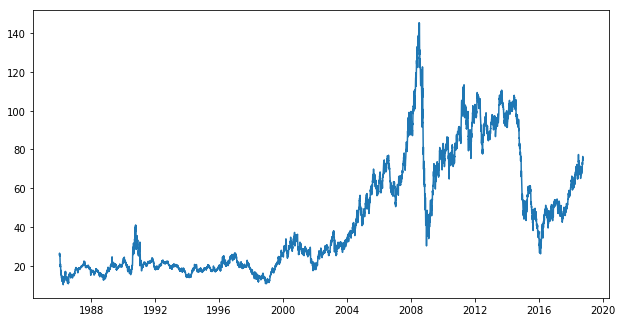

In [13]:
fig = plt.figure()
fig.set_size_inches(8,4)
ax = fig.add_axes([0,0,1,1])
ax.plot(mydata)

In [14]:
cpi = quandl.get("FRED/DDOE02USA086NWDB", authtoken="yourapikey")  # write your own quandl api key. You have to create an account 

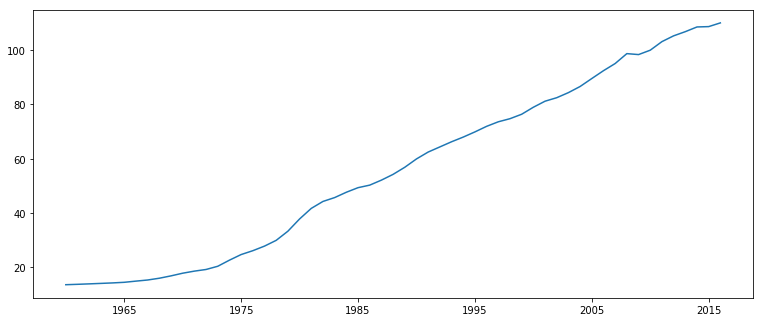

In [15]:
fig = plt.figure()
fig.set_size_inches(10,4)
ax = fig.add_axes([0,0,1,1])
ax.plot(cpi)

In [16]:
div = quandl.get("FRED/M1346BUSM156NNBR", authtoken="yourapikey")  # write your own quandl api key. You have to create an account 
div.tail()

,VALUE
DATE,
1968-10-01,2.94
1968-11-01,2.92
1968-12-01,2.93
1969-01-01,3.06
1969-02-01,3.10


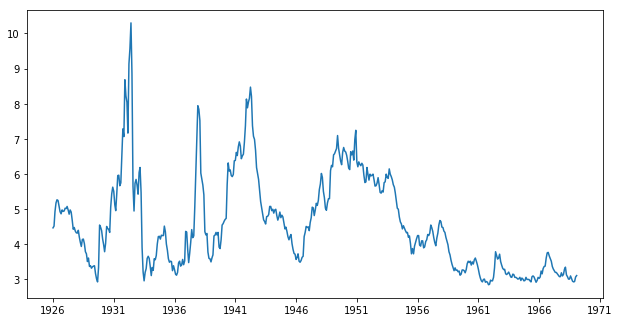

In [17]:
fig = plt.figure()
fig.set_size_inches(8,4)
ax = fig.add_axes([0,0,1,1])
ax.plot(div)

## Nikkei database by quandl
* https://www.quandl.com/data/NIKKEI-Nikkei

In [18]:
nikkei = quandl.get('NIKKEI/INDEX', authtoken="yourapikey")  # write your own quandl api key. You have to create an account )

In [19]:
# set today to today
today = str(datetime.datetime.today()).split()[0]
today

'2018-10-14'

In [20]:
nikkei.tail()

,Open Price,High Price,Low Price,Close Price
Date,,,,
2018-10-05,23781.76,23928.62,23730.19,23783.72
2018-10-09,23550.47,23587.05,23442.46,23469.39
2018-10-10,23538.92,23589.38,23373.54,23506.04
2018-10-11,23043.37,23051.19,22459.02,22590.86
2018-10-12,22323.43,22711.13,22323.43,22694.66


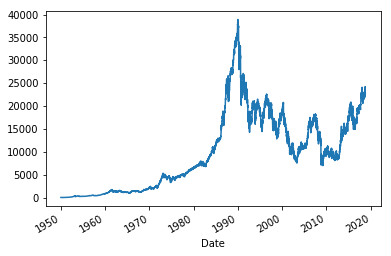

In [21]:
nikkei['Close Price'].plot()

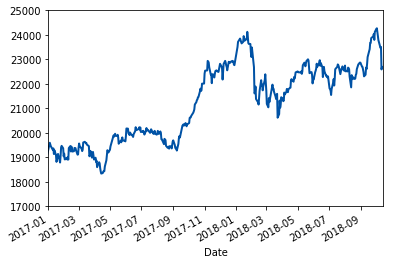

In [22]:
nikkei['Close Price'].plot(xlim=['2017-01-01',today],ylim=[17000,25000],lw=2,ls='-', c=(0/255,82/255,165/255))
# set xlim and ylim

### get the date and tdata seprately from the db

In [23]:
idx = nikkei.loc['2017-01-01':today].index  # grab the index you concern with
idx

DatetimeIndex(['2017-01-04', '2017-01-05', '2017-01-06', '2017-01-10',
               '2017-01-11', '2017-01-12', '2017-01-13', '2017-01-16',
               '2017-01-17', '2017-01-18',
               ...
               '2018-09-28', '2018-10-01', '2018-10-02', '2018-10-03',
               '2018-10-04', '2018-10-05', '2018-10-09', '2018-10-10',
               '2018-10-11', '2018-10-12'],
              dtype='datetime64[ns]', name='Date', length=439, freq=None)

In [24]:
nikkei_price = nikkei.loc['2017-01-01':today]['Close Price']  # grab the price you concern with
nikkei_price.tail()

Date
2018-10-05    23783.72
2018-10-09    23469.39
2018-10-10    23506.04
2018-10-11    22590.86
2018-10-12    22694.66
Name: Close Price, dtype: float64

## Three ways of doing the same thing

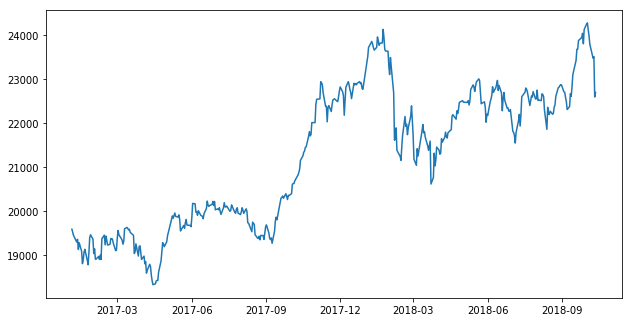

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(8,4)
ax = fig.add_axes([0,0,1,1])
# Tell matplot that we are dealing with datetime information
ax.plot_date(idx,nikkei_price, '-')  # '-' creates a line

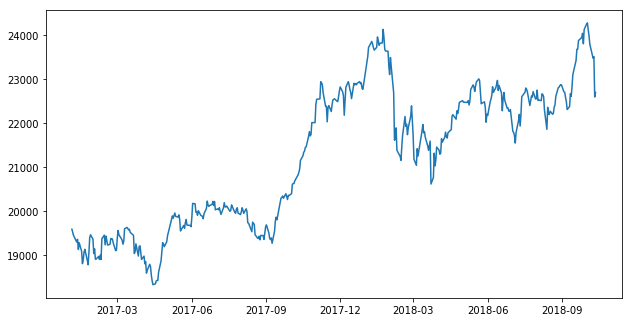

In [26]:
fig = plt.figure()
fig.set_size_inches(8,4)
ax = fig.add_axes([0,0,1,1])
ax.plot_date(idx,nikkei_price,'-')

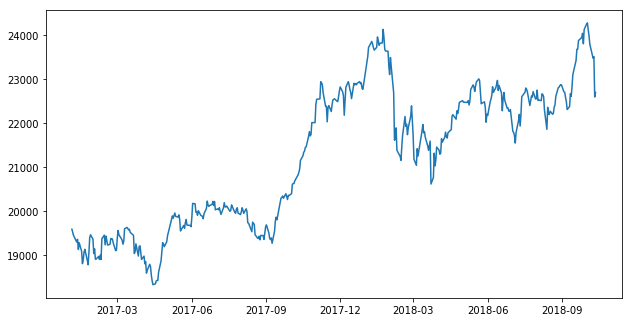

In [27]:
fig = plt.figure()
fig.set_size_inches(8,4)
ax = fig.add_axes([0,0,1,1])
ax.plot(nikkei_price)

### Fix the overlap in the x axis
`fig.autofmt_xdate()` 

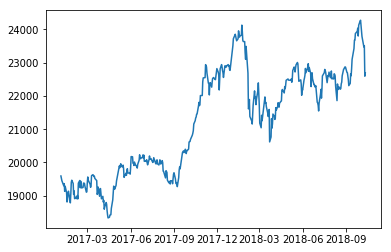

In [28]:
fig, ax = plt.subplots()
# fig.set_size_inches(4,4)
# ax = fig.add_axes([0,0,1,1])
# Tell matplot that we are dealing with datetime information
ax.plot_date(idx,nikkei_price, '-')  # '-' creates a line

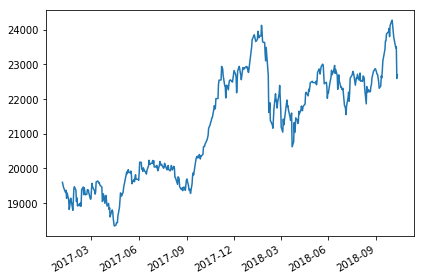

In [29]:
fig, ax = plt.subplots()
# fig.set_size_inches(4,4)
# ax = fig.add_axes([0,0,1,1])
# Tell matplot that we are dealing with datetime information
ax.plot_date(idx,nikkei_price, '-')  # '-' creates a line
fig.autofmt_xdate()  # automatically format the xaxis
plt.tight_layout()

### Add grid lines
`ax.yaxis.grid(True)`

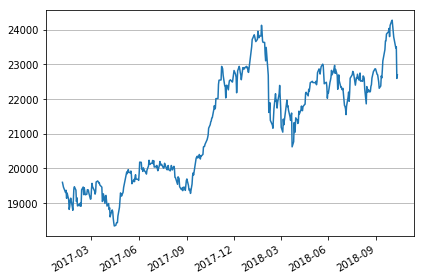

In [30]:
fig, ax = plt.subplots()
# Tell matplot that we are dealing with datetime information
ax.plot_date(idx,nikkei_price, '-')  # '-' creates a line
ax.yaxis.grid(True)
fig.autofmt_xdate()  # automatically format the xaxis
plt.tight_layout()

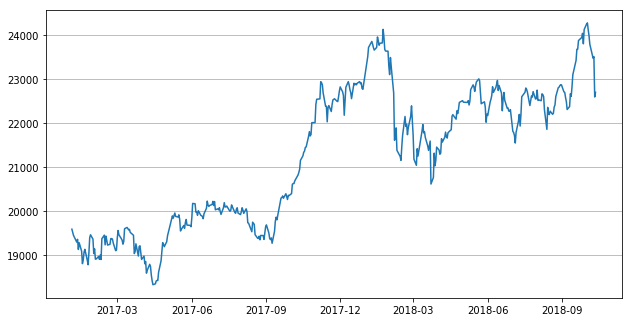

In [31]:
fig = plt.figure()
fig.set_size_inches(8,4)
ax = fig.add_axes([0,0,1,1])
ax.yaxis.grid(True)
ax.plot(nikkei_price)

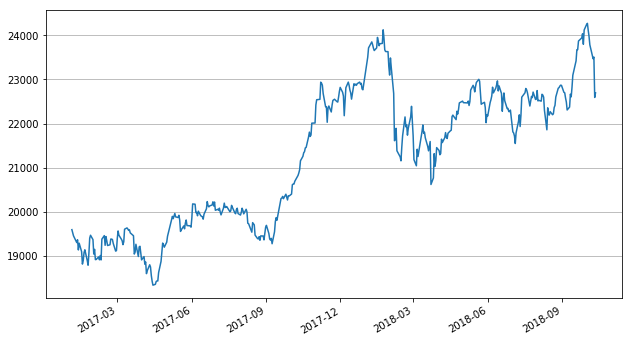

In [32]:
fig = plt.figure()
fig.set_size_inches(8,4)
ax = fig.add_axes([0,0,1,1])
ax.yaxis.grid(True)
fig.autofmt_xdate()  # automatically format the xaxis
ax.plot(nikkei_price)

## Other matplotlib settings

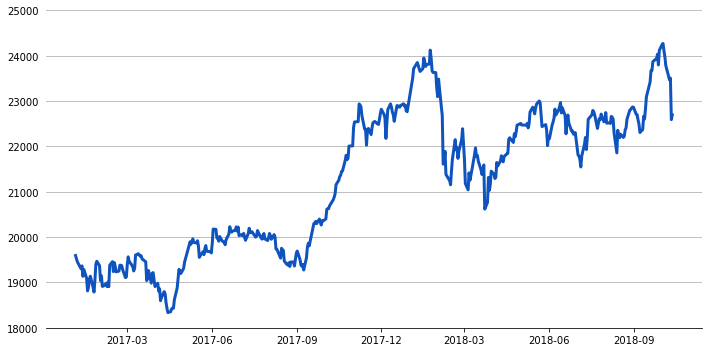

In [42]:
fig, ax = plt.subplots()
fig.set_size_inches(10,5) # set the size of the fig
# Tell matplot that we are dealing with datetime information
ax.plot_date(idx,nikkei_price, '-', c=(15/250,82/250,186/250), lw=3)  # '-' creates a line and set the RGB color of the line
ax.yaxis.grid(True)
ax.yaxis.set_ticks_position('none') # remove ticks
ax.set_ylim([18000,25000]) # set ylim and xlim
# ax.tick_params(labelbottom="off",bottom="off") # remove xaxis
# ax.tick_params(labelleft="off",left="off") # remove yaxis
# ax.set_xticklabels([]) 
# plt.box(on=None) # remove the box around
# fig.autofmt_xdate()  # automatically format the xaxis
plt.tight_layout()
sns.despine(left=True, bottom=False, right=True, top=True) # remove left, right and top box line

## Import Financial Data Set with pandas_datareader Library

In [43]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import fix_yahoo_finance as yf  

In [44]:
#data = yf.download('AMZN','2018-01-01','2018-09-26')
#data.Close.plot()
#plt.show()

In [61]:
company = "^GSPC"  # this is 
start = "2017-01-01"
end = today

# download dataframe
stocks = pdr.get_data_yahoo(company, start = start, end = end)

# download Panel
# data = pdr.get_data_yahoo(["SPY", "IWM"], start = start, end = end)

stocks.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,2263.879883,2245.129883,2251.570068,2257.830078,3770530000,2257.830078
2017-01-04,2272.820068,2261.600098,2261.600098,2270.750000,3764890000,2270.750000
2017-01-05,2271.500000,2260.449951,2268.179932,2269.000000,3761820000,2269.000000
2017-01-06,2282.100098,2264.060059,2271.139893,2276.979980,3339890000,2276.979980
2017-01-09,2275.489990,2268.899902,2273.590088,2268.899902,3217610000,2268.899902


In [57]:
idx = stocks.loc['2017-01-01':today].index  # grab the index you concern with
stock_price = stocks.loc['2017-01-01':today]['Adj Close']  # grab the price you concern with

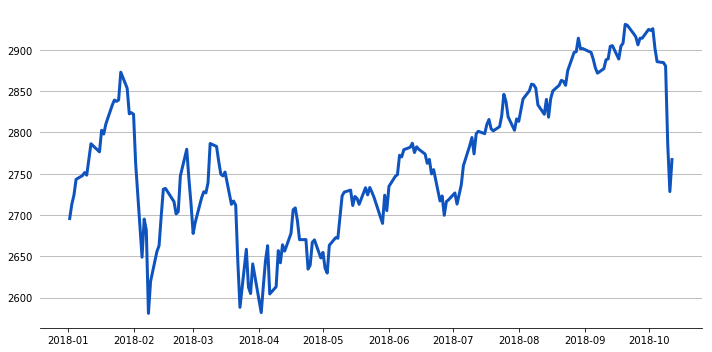

In [59]:
fig, ax = plt.subplots()
fig.set_size_inches(10,5) # set the size of the fig
# Tell matplot that we are dealing with datetime information
ax.plot_date(idx,stock_price, '-', c=(15/250,82/250,186/250), lw=3)  # '-' creates a line and set the RGB color of the line
ax.yaxis.grid(True)
ax.yaxis.set_ticks_position('none') # remove ticks
#ax.set_ylim([1000,2200]) # set ylim and xlim
# ax.tick_params(labelbottom="off",bottom="off") # remove xaxis
# ax.tick_params(labelleft="off",left="off") # remove yaxis
# ax.set_xticklabels([]) 
# plt.box(on=None) # remove the box around
# fig.autofmt_xdate()  # automatically format the xaxis
plt.tight_layout()
sns.despine(left=True, bottom=False, right=True, top=True) # remove left, right and top box line